In [76]:
from enum import unique
import pickle
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import networkx as nx
import os
from dotenv import load_dotenv 
load_dotenv()
import numpy as np


df = pd.read_pickle(os.environ['SAVE_DF_PATH']+str(os.environ["NUMBER_OF_BLOCKS"]))

sender = df['Sender Address'].tolist()
receiver = df['Receiver Address'].tolist()
total = sender + receiver

# new_df = df.groupby(['Receiver Address'])['Sender Address'].count().reset_index(
#   name='Count').sort_values(['Count'], ascending=False)

# Voy a realizar estadistica descriptiva sobre todas las transacciones que tengo

# Numero de transacciones totales en 500 bloques
total_transactions = len(sender)
# Numero de Senders
sender_unique = list(set(sender))
# Numero de Receivers
receiver_unique = list(set(receiver))
# Numero total de cuentas activas en este chunk
total_accounts = list(set(total))
# Numero de transacciones promedio por sender
txn_per_sender= []
unique_connections_per_sender= []
for sender in sender_unique:
    txns = df[df['Sender Address'] == sender]
    received_txns_addresses = txns['Receiver Address'].tolist()
    unique_received_txns_addresses = list(set(received_txns_addresses))
    txn_number = len(received_txns_addresses)
    unique_txn_number = len(unique_received_txns_addresses)

    txn_per_sender.append(txn_number)
    unique_connections_per_sender.append(unique_txn_number)
txn_per_sender = np.array(txn_per_sender)
unique_connections_per_sender = np.array(unique_connections_per_sender)
mean_txn_per_sender = np.mean(txn_per_sender)
mean_unique_connections_per_sender = np.mean(unique_connections_per_sender)

#print(mean_txn_per_sender)
#print(mean_unique_connections_per_sender)

print(len(sender_unique))
print(len(receiver_unique))

1380
16284


In [77]:
# Numero de transacciones promedio por receiver
txn_per_receiver= []
unique_connections_per_receiver= []
for receiver in receiver_unique:
    txns = df[df['Receiver Address'] == receiver]
    sent_txns_addresses = txns['Sender Address'].tolist()
    unique_sent_txns_addresses = list(set(sent_txns_addresses))
    txn_number = len(sent_txns_addresses)
    unique_txn_number = len(unique_sent_txns_addresses)

    txn_per_receiver.append(txn_number)
    unique_connections_per_receiver.append(unique_txn_number)

txn_per_receiver = np.array(txn_per_receiver)
unique_connections_per_receiver = np.array(unique_connections_per_receiver)
mean_txn_per_receiver = np.mean(txn_per_receiver)
mean_unique_connections_per_receiver = np.mean(unique_connections_per_receiver)

print(mean_txn_per_receiver)
print(mean_unique_connections_per_receiver)

2.696389093588799
1.2485875706214689


In [15]:
# De el total de cuentas, cuantas son solo senders, cuantas solo receivers, cuantas ambas?
### Para senders
only_sender = []
only_receiver = []

for sender in sender_unique:
    receiving_sender = df[df['Receiver Address'] == sender]
    receiving_sender = receiving_sender['Receiver Address'].tolist()
    if len(receiving_sender) == 0:
        only_sender.append(sender)

print(len(only_sender))
sender_proportion = len(only_sender)/len(sender_unique)
sender_total_proportion = len(only_sender)/len(total_accounts)
print(sender_proportion)
print(sender_total_proportion)

### Para receivers


for receiver in receiver_unique:
    sending_receiver = df[df["Sender Address"] == receiver]
    sending_receiver = sending_receiver['Sender Address'].tolist()
    if len(sending_receiver) == 0:
        only_receiver.append(receiver)

print(len(only_receiver))
receiver_proportion = len(only_receiver)/len(receiver_unique)
receiver_total_proportion = len(only_receiver) / len(total_accounts)
print(receiver_proportion)
print(receiver_total_proportion)

325
0.23550724637681159
0.01956770425672828
15229
0.9169125173098922
0.9352124785065095


In [78]:
# Numero de cuentas unicas con las que se comunica un sender

# Numero de cuentas unicas con las que se comunica un receiver

# De las cuentas con las que interactua, cuantas veces se comunica en promedio con la misma cuenta?


sender_comms_count = [] # aca guardo con cuantas cuentas se comunica un sender
receiver_comms_count = [] #aca guardo con cuantas cuentas se comunica un receiver
mean_accounts_senders = [] # aca guardo cuantas veces se comunica con un mismo receiver cada sender
mean_accounts_receivers = [] #aca guardo cuantas veces se comunica con un mismo sender cada receiver

for sender in sender_unique:
    sender_filtered = df[df['Sender Address'] == sender]
    receivers = sender_filtered['Receiver Address'].tolist()
    sender_comms_count.append(len(receivers))
    for receiver in list(set(receivers)):
        counter = []
        counter.append(receivers.count(receiver))
    counter = np.array(counter)
    mean_accounts_senders.append(np.mean(counter))

mean_accounts_senders = np.array(mean_accounts_senders)
real_mean_senders = np.mean(mean_accounts_senders)


for receiver in receiver_unique:
    receiver_filtered = df[df['Receiver Address'] == receiver]
    senders = receiver_filtered['Sender Address'].tolist()
    receiver_comms_count.append(len(senders))
    for sender in list(set(senders)):
        counter = []
        counter.append(senders.count(sender))
    counter = np.array(counter)
    mean_accounts_receivers.append(np.mean(counter))

mean_accounts_receivers = np.array(mean_accounts_receivers)
real_mean_receivers = np.mean(mean_accounts_receivers)

print(np.mean(np.array(sender_comms_count)))
print(np.mean(np.array(receiver_comms_count)))
print(real_mean_senders)
print(real_mean_receivers)


31.817391304347826
2.696389093588799
8.71376811594203
1.986858265782363


[27165954, 127746157, 226701642, 31566704, 283820866, 312769, 287867876, 511484048, 575353596, 575358142]
[0.61439494 0.26179875 0.0481469  0.00546566 0.00346977 0.00334695
 0.00328553 0.00325483 0.00224153 0.00202659]
[75, 1, 476, 111, 50, 78, 29, 13, 11, 11]
[14516, 1, 453, 98, 52, 80, 33, 64, 63, 60]
[14571, 1, 521, 128, 59, 93, 40, 69, 64, 60]
16609
[8.77295442e+01 6.02083208e-03 3.13685351e+00 7.70666506e-01
 3.55229093e-01 5.59937383e-01 2.40833283e-01 4.15437413e-01
 3.85333253e-01 3.61249925e-01]


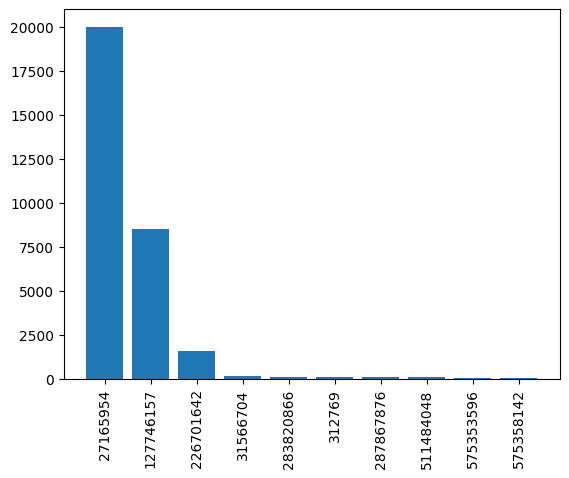

In [121]:
# Cual es el asset id que mas se repite? Cuanto porcentaje de las transacciones involucran a cada asset?

asset_id = df['Asset Id'].tolist()

ids = []
for i in range(len(asset_id)):

    id = asset_id[i]
    if id != 'NA':
        ids.append(id)

for id in ids:
    id = str(id)
ids = pd.DataFrame(data= {"Asset Id": ids})
asset_txn = len(ids['Asset Id'].tolist())


counter = ids.groupby(['Asset Id'])['Asset Id'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
counter = counter[:10]

Ids = counter['Asset Id'].tolist()
counts = counter['Count'].tolist()

ticks = range(len(Ids))

plt.bar(ticks, counts, align = 'center')
plt.xticks(ticks, Ids, rotation = 'vertical')

asset_total_proportion = np.array(counts)/asset_txn
print(Ids)
print(asset_total_proportion)

unique_accounts = []
unique_sending = []
unique_receiving = []
# Cuantas cuentas unicas usan ese mismo asset? Cual es el promedio de cuentas que usan cada asset? Histograma de eso
for id in Ids:

  filtered = df[df['Asset Id'] == id]
  sending = filtered['Sender Address'].tolist()
  receiving = filtered['Receiver Address'].tolist()
  unique_sending.append(len(list(set(sending))))
  unique_receiving.append(len(list(set(receiving))))
  total = sending + receiving
  unique_accounts.append(len(list(set(total))))

print(unique_sending)
print(unique_receiving)
print(unique_accounts)
print(len(total_accounts))

account_proportion = np.array(unique_accounts)/len(total_accounts)
print(account_proportion*100)

In [ ]:
# Numero de transacciones que involucran un amount igual a 0, menor a 1, que tipo de asset se mandan?

# Por cada tipo de transaccion, cuantas cuentas estan involucradas? Cuanto porcentaje del total de las transacciones en este chunk?

# Cual es el promedio de senders y receivers por cada tipo de transaccion?

# Dentro de la temporalidad que tengo, los asset que salen de una cuenta, vuelven a ingresar? o solamente se van y no vuelven?

### Esto me puede decir capaz que hay senders mas centrales que distribuyen a receivers, capaz no es equitativo

# Histograma de tipo de transaccion

### Dentro del tipo pay que pasa? la gente se manda algos?

# Histograma de distacia entre transacciones (contando por bloque) promedio para senders y receivers

# Para el address central, hay algun tipo de temporalidad para el envio de las transacciones que hace? y para las que ya hizo, se repiten?

### Cosas que necesito algun tipo de API

# Obtener la cantidad de transacciones totales hechas por cada cuenta unica en el frame de temporalidad de 500 bloques, y ver si se puede
# deducir a partir de cuantas transacciones hace en promedio una cuenta si alguien es una app o un humano. Importa tambien cuantas
# transacciones en promedio realiza cada address en su lifetime.